# Проект: Поведение пользователей в мобильном приложении, где продаются подукты

Цель исследования: изучение результатов а/а/б тестирования. 

В начале ознакомимся с данными и проверим их на ошибки, пропуски, дубликаты. Исправим их и приведем к виду, который требуется для более детального изучения данных и для дальнейшего использования. 

Затем изучим данные более детально: за какой период они нам доступны. Выберем корректный период. Изучим более детально группы теста. 

Затем построим пользовательскую воронку и изучим, сколько пользователей переходят на следующий шаг. 

Проведем статистические тесты а/а для групп 246 и 247. Зафиксируем результат. Выявим причины. Затем проведем тест в/б для групп 246, 247 и 248. Затем посмотрим, различаются ли в сумму 246 и 247 от контрольной группы. Зафиксируем результат. Выявим причины. Сравним результаты. Сделаем выводы продолжать ли тест или нет.

## Подготовка данных

In [82]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
import math as mth
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go


In [83]:
data = pd.read_csv('/datasets/logs_exp.csv')

In [84]:
data.head()

,EventName\tDeviceIDHash\tEventTimestamp\tExpId
0,MainScreenAppear\t4575588528974610257\t1564029...
1,MainScreenAppear\t7416695313311560658\t1564053...
2,PaymentScreenSuccessful\t3518123091307005509\t...
3,CartScreenAppear\t3518123091307005509\t1564054...
4,PaymentScreenSuccessful\t6217807653094995999\t...


In [85]:
data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [86]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [88]:
data.rename(columns=str.lower, inplace=True)

In [89]:
data.head()

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [90]:
data.isnull().sum()

eventname         0
deviceidhash      0
eventtimestamp    0
expid             0
dtype: int64

In [91]:
data.duplicated().sum()

413

Дубликаты составляют меньше процента, поэтому их можно удалить. 

In [92]:
data.drop_duplicates(inplace=True)

In [93]:
data.duplicated().sum()

0

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   eventname       243713 non-null  object
 1   deviceidhash    243713 non-null  int64 
 2   eventtimestamp  243713 non-null  int64 
 3   expid           243713 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


In [95]:
data['eventtimestamp'] = pd.to_datetime(data['eventtimestamp'] , utc = True, unit = 's')

In [96]:
data.head()

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36+00:00,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42+00:00,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47+00:00,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47+00:00,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42+00:00,248


In [97]:
data['date'] = data['eventtimestamp'].dt.date

In [98]:
data.head()

,eventname,deviceidhash,eventtimestamp,expid,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36+00:00,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42+00:00,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47+00:00,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47+00:00,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42+00:00,248,2019-07-25


Данные проверены на ошибки. Названия столбцов приведены к нижнему регистру для удобства В таблицах отсутствуют пропуски. Были удалены дубликаты, которых было совсем немного. В данных были приведены к нужному типу данных. Также был создан дополнительны столбец только с датой для дальнейшей сортировки данных по датам. 

# Изучение и проверка данных

Посчитаем, сколько всего событий у нас зафиксировано в данных.

In [99]:
data['eventname'].count()

243713

Сколько всего пользователей в логе.

In [100]:
len(data['deviceidhash'].unique())

7551

In [101]:
round(data['eventname'].count() / len(data['deviceidhash'].unique()), 2)

32.28

Каждый пользователей совершает примерно 32 события. 

Узнаем за какой период нам доступны данные.

In [102]:
data['date'].min()

datetime.date(2019, 7, 25)

In [103]:
data['date'].max()

datetime.date(2019, 8, 7)

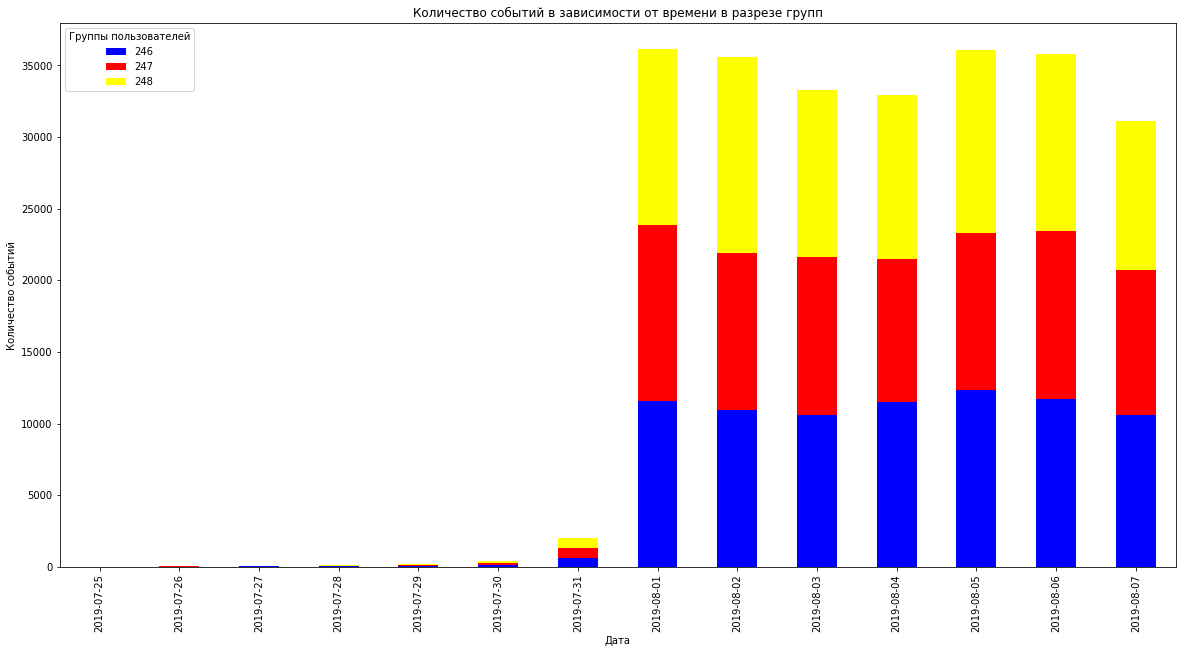

In [104]:
(
data.groupby(['date', 'expid'])['eventname'].count().unstack().plot(kind='bar', 
stacked=True, color=['blue', 'red', 'yellow'], figsize=(20, 10))
)

plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Количество событий в зависимости от времени в разрезе групп')
plt.legend(title='Группы пользователей')

plt.show()


Построив график по дням мы видим сильную разницу в количестве событий по датам. Такая разница не может сформироваться по естественным причинам. Данные по 07.31 не полные. Следует изучать данные с 01.08. Полные данные у нас по группам остались ровно за неделю с 01.08 по 08.07. 

In [105]:
data = data[data['date'] > dt.date(2019, 7, 31)]
data.head()

,eventname,deviceidhash,eventtimestamp,expid,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28+00:00,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00+00:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55+00:00,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58+00:00,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59+00:00,247,2019-08-01


In [106]:
print(data['date'].min())
print(data['date'].max())

2019-08-01
2019-08-07


In [107]:
len(data['deviceidhash'].unique())

7534

In [108]:
data['eventname'].count()

240887

In [109]:
round(data['eventname'].count() / len(data['deviceidhash'].unique()), 2)

31.97

Обрезав таблицу, по датам с неполными данными, мы видим, что количество событий и пользователей практически не изменилось. В среднем получилось также 32 события на пользователя. 

In [110]:
data.groupby(['expid'])['deviceidhash'].count()

expid
246    79302
247    77022
248    84563
Name: deviceidhash, dtype: int64

Мы видим, что события во всех трех группах присутствуют и имеют не значительную разницу. Можно выделить, что в группе б больше событий чем в других. Посмотрим, отразилось ли это как-то на пользователях. 

In [111]:
data.groupby('expid')['deviceidhash'].nunique()

expid
246    2484
247    2513
248    2537
Name: deviceidhash, dtype: int64

Мы видим, что пользователи всех трех групп также никуда не пропали, после того, как мы обрезали данные. Количество пользователей в группах различное, но насколько это различие существенно, узнаем с помощью тестов. 

In [112]:
print(data.groupby('deviceidhash').agg({'expid' : 'nunique'}).query('expid>1').count())

expid    0
dtype: int64


В тесте у нас присутствует группы 246, 247 и 248. 2 группы для а/а теста, последня экспериментальная б соответственно. Были представлены данные с 25.07.19 по 07.08.19. Мы обрезали данные, так как по 07.31. Это не повлияло значительно на группы и сами данные. Были обнаружены неполные данные за несколько первых дней.  Пресечение покупателей в группах тоже проверили, их нет.

# Воронка событий

Рассмотрим какие события выстраиваются в воронку. 

In [113]:
data['eventname'].unique()

array(['Tutorial', 'MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful'], dtype=object)

In [114]:
print(data.groupby('deviceidhash').agg({'eventname' : 'nunique'}).query('eventname>4').head())

                   eventname
deviceidhash                
9841258664663090           5
29094035245869447          5
77364241990273403          5
84107839139059565          5
89078601045475920          5


In [115]:
data[data['deviceidhash'] == 9841258664663090].sort_values(by='eventtimestamp', ascending=True)

,eventname,deviceidhash,eventtimestamp,expid,date
86464,Tutorial,9841258664663090,2019-08-03 10:47:28+00:00,248,2019-08-03
86487,MainScreenAppear,9841258664663090,2019-08-03 10:47:59+00:00,248,2019-08-03
86539,OffersScreenAppear,9841258664663090,2019-08-03 10:49:42+00:00,248,2019-08-03
86636,CartScreenAppear,9841258664663090,2019-08-03 10:52:15+00:00,248,2019-08-03
88013,MainScreenAppear,9841258664663090,2019-08-03 11:22:54+00:00,248,2019-08-03
88046,MainScreenAppear,9841258664663090,2019-08-03 11:23:54+00:00,248,2019-08-03
88143,MainScreenAppear,9841258664663090,2019-08-03 11:25:38+00:00,248,2019-08-03
88152,OffersScreenAppear,9841258664663090,2019-08-03 11:25:47+00:00,248,2019-08-03
88296,OffersScreenAppear,9841258664663090,2019-08-03 11:27:38+00:00,248,2019-08-03
88309,OffersScreenAppear,9841258664663090,2019-08-03 11:27:51+00:00,248,2019-08-03


In [116]:
data.groupby('eventname')['eventname'].count().sort_values(ascending=False)

eventname
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: eventname, dtype: int64

Первым идет событие захода пользователя на главный экран, затем открытие экрана с предложениями (с продуктами, товаром)(или акционные ?), затем добавление товара в корзину, затем успешная оплата. Каждое следующее событие выполняют меньшее количество раз. 

Не совсем понял что за последнее событие. Это может быть справка о покупке, подробное описание товара (состав продукта). Судя по количеству этих событий они в воронке не участвуют либо участвуют для более узкой группы, нежели у нас. Во всяком случае, это событие для нас не несет значения. 

In [117]:
data.groupby('eventname')['deviceidhash'].nunique().sort_values(ascending=False)


eventname
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: deviceidhash, dtype: int64

In [118]:
round(
    data.groupby('eventname')['deviceidhash'].nunique().sort_values(ascending=False)
    / data['deviceidhash'].nunique() * 100
)

eventname
MainScreenAppear           98.0
OffersScreenAppear         61.0
CartScreenAppear           50.0
PaymentScreenSuccessful    47.0
Tutorial                   11.0
Name: deviceidhash, dtype: float64

Порядок событий мы уже выявили ранее. Что интересно, что заход на главную страницу не составляет 100 %. Это свидетельствует о том, что пользователи могут попадать с рекламы минуя главную на продукт. Все остальное довольно закономерно. 

In [119]:
eventname_data = data.groupby('eventname')['deviceidhash'].nunique().sort_values(ascending=False).reset_index()

eventname_data.columns = ['eventname', 'deviceidhash']

eventname_data

,eventname,deviceidhash
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [120]:
eventname_data_ = eventname_data['deviceidhash'].to_dict()

eventname_data_

{0: 7419, 1: 4593, 2: 3734, 3: 3539, 4: 840}

In [121]:
(
print('OffersScreenAppear:', round(eventname_data_[1] /
      eventname_data_[0] * 100
     )))
(
print('CartScreenAppear:', round(eventname_data_[2] /
      eventname_data_[1] * 100
     )))
(
print('PaymentScreenSuccessful:', round(eventname_data_[3] /
      eventname_data_[2] * 100
     )))

OffersScreenAppear: 62
CartScreenAppear: 81
PaymentScreenSuccessful: 95


Больше всего потерь происходит на этапе перехода с главной страницы на карточку товара. То есть много клиентов, которым не подходит товар на этапе просмотра главной страницы. Более маленький процент потерь происходит с каждым следующим этапом. 

In [122]:
round(eventname_data_[3]/eventname_data_[0] * 100)

48

Всего до этапа покупки с этапа просмотра главной страницы доходит 48% пользователей. 

Мы рассмотрели события и увидели, что одно из 5 событий не встраивается в воронку. Это событие мы исключили. У нас получилась воронка главная страница - страница продукта - корзина - оплата. Всего пользователей, с первого шага на второй попадает 62%, со второго на третий 81%, с третьего на четвертый 95%. Всего пользователей с главной страницы доходят до оплаты 48%.

In [123]:
eventname_data['ratio'] = eventname_data['deviceidhash'] / eventname_data['deviceidhash'].shift(1)

eventname_data = eventname_data.query('eventname != "Tutorial"')


fig = go.Figure()
fig.add_trace(go.Funnel(
y = eventname_data['eventname'], 
x = eventname_data['deviceidhash'], 
textinfo = 'value+percent initial+percent previous'))
fig.update_layout(title = 'Воронка событий')

# Изучение результата эксперимента 

## а/а тестирование 

In [124]:
data.groupby('expid')['deviceidhash'].nunique()

expid
246    2484
247    2513
248    2537
Name: deviceidhash, dtype: int64

Группы друг от друга отличаются на процент. В таком случае группы не значительно друг от друга отличаются и их допустимо сравнивать. 

Подготовим данные для теста по пользователям по группам 246 и 247. 

In [125]:
data_246 = data.query('expid == 246 and eventname != "Tutorial"')
data_246_gr = data_246.groupby('eventname')['deviceidhash'].nunique().sort_values(ascending=False).reset_index()

data_246_gr.columns = ['eventname', 'deviceidhash']
all_246 = data_246['deviceidhash'].nunique()
data_246_gr['ratio'] = data_246_gr['deviceidhash'] / all_246
print(all_246)
print(data_246_gr)

2483
                 eventname  deviceidhash     ratio
0         MainScreenAppear          2450  0.986710
1       OffersScreenAppear          1542  0.621023
2         CartScreenAppear          1266  0.509867
3  PaymentScreenSuccessful          1200  0.483286


In [126]:
data_247 = data.query('expid == 247 and eventname != "Tutorial"')
data_247_gr = data_247.groupby('eventname')['deviceidhash'].nunique().sort_values(ascending=False).reset_index()

data_247_gr.columns = ['eventname', 'deviceidhash']
data_247_gr

,eventname,deviceidhash
0,MainScreenAppear,2476
1,OffersScreenAppear,1520
2,CartScreenAppear,1238
3,PaymentScreenSuccessful,1158


In [127]:
all_247 = data_247['deviceidhash'].nunique()
all_247

2512

In [128]:
data_247_gr['ratio'] = data_247_gr['deviceidhash'] / all_247

data_247_gr

,eventname,deviceidhash,ratio
0,MainScreenAppear,2476,0.985669
1,OffersScreenAppear,1520,0.605096
2,CartScreenAppear,1238,0.492834
3,PaymentScreenSuccessful,1158,0.460987


Нулевая гипотеза: разницы в конверсии между группами 246 и 247 по заходам на главную страницу нет. Альтернативная гипотеза: разница в конверсии между группами 246 и 247 по заходам на главную страницу есть. 

In [129]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_246_gr.iloc[0]['deviceidhash'] + data_247_gr.iloc[0]['deviceidhash']) / (all_246 + all_247)

# разница пропорций в датасетах
difference = data_246_gr.iloc[0]['ratio'] - data_247_gr.iloc[0]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_246 + 1/all_247))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [130]:

fwer = 1-(1-0.05)**(1/16)
print(fwer)
print(fwer < p_value)


0.0032006977101884937
True


Нулевая гипотеза: разницы в конверсии между группами 246 и 248 по переходу на страницу продукта нет. Альтернативная гипотеза: разница в конверсии между группами 246 и 248 по переходу на страницу продукта есть.

In [131]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_246_gr.iloc[1]['deviceidhash'] + data_247_gr.iloc[1]['deviceidhash']) / (all_246 + all_247)

# разница пропорций в датасетах
difference = data_246_gr.iloc[1]['ratio'] - data_247_gr.iloc[1]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_246 + 1/all_247))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.24786096925282264
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [132]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между группами 246 и 248 по добавлению в корзину нет. Альтернативная гипотеза: разница в конверсии между группами 246 и 248 по добавлению в корзину есть.

In [133]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_246_gr.iloc[2]['deviceidhash'] + data_247_gr.iloc[2]['deviceidhash']) / (all_246 + all_247)

# разница пропорций в датасетах
difference = data_246_gr.iloc[2]['ratio'] - data_247_gr.iloc[2]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_246 + 1/all_247))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.22867643757335676
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [134]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между группами 246 и 247 по оплатившим пользователям нет. Альтернативная гипотеза: разница в конверсии между группами 246 и 247 по оплатившим пользователям есть.

In [135]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_246_gr.iloc[3]['deviceidhash'] + data_247_gr.iloc[3]['deviceidhash']) / (all_246 + all_247)

# разница пропорций в датасетах
difference = data_246_gr.iloc[3]['ratio'] - data_247_gr.iloc[3]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_246 + 1/all_247))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.11446627829276612
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [136]:
print(fwer < p_value)

True


Как мы видим, у нас не получилось опровергнуть, что 2 группы а отличаются друг от друга. 

## a/b тест 

Сравним первую группу из а/а теста (246) с группой б (248).

Подготовим данные по пользователям для анализа. 

In [137]:
data_248 = data.query('expid == 248 and eventname != "Tutorial"')
data_248_gr = data_248.groupby('eventname')['deviceidhash'].nunique().sort_values(ascending=False).reset_index()

data_248_gr.columns = ['eventname', 'deviceidhash']
all_248 = data_248['deviceidhash'].nunique()
data_248_gr['ratio'] = data_248_gr['deviceidhash'] / all_248
print(all_248)
print(data_248_gr)

2535
                 eventname  deviceidhash     ratio
0         MainScreenAppear          2493  0.983432
1       OffersScreenAppear          1531  0.603945
2         CartScreenAppear          1230  0.485207
3  PaymentScreenSuccessful          1181  0.465878


Нулевая гипотеза: разницы в конверсии между группами 246 и 248 по заходам на главную страницу нет. Альтернативная гипотеза: разница в конверсии между группами 246 и 248 по заходам на главную страницу есть.

In [138]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_246_gr.iloc[0]['deviceidhash'] + data_248_gr.iloc[0]['deviceidhash']) / (all_246 + all_248)

# разница пропорций в датасетах
difference = data_246_gr.iloc[0]['ratio'] - data_248_gr.iloc[0]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_246 + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 
    

p-значение:  0.3387114076159288
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [139]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между группами 246 и 248 по переходу на страницу продукта нет. Альтернативная гипотеза: разница в конверсии между группами 246 и 248 по переходу на страницу продукта есть.

In [140]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_246_gr.iloc[1]['deviceidhash'] + data_248_gr.iloc[1]['deviceidhash']) / (all_246 + all_248)

# разница пропорций в датасетах
difference = data_246_gr.iloc[1]['ratio'] - data_248_gr.iloc[1]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_246 + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.21442476639710506
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [141]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между группами 246 и 248 по добавлению в корзину нет. Альтернативная гипотеза: разница в конверсии между группами 246 и 248 по добавлению в корзину есть.

In [142]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_246_gr.iloc[2]['deviceidhash'] + data_248_gr.iloc[2]['deviceidhash']) / (all_246 + all_248)

# разница пропорций в датасетах
difference = data_246_gr.iloc[2]['ratio'] - data_248_gr.iloc[2]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_246 + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.08067367598823139
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [143]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между группами 246 и 248 по оплатившим пользователям нет. Альтернативная гипотеза: разница в конверсии между группами 246 и 248 по оплатившим пользователям есть.

In [144]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_246_gr.iloc[3]['deviceidhash'] + data_248_gr.iloc[3]['deviceidhash']) / (all_246 + all_248)

# разница пропорций в датасетах
difference = data_246_gr.iloc[3]['ratio'] - data_248_gr.iloc[3]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_246 + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.21693033984516674
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [145]:
print(fwer < p_value)

True


Как мы видим у нас не получилось отвергнуть нулевую гипотезу. Группы 246 и 248 не имеют статистического различия. 

Теперь сравним группу 247 с группой б (248) с помошью статестического теста. 

Нулевая гипотеза: разницы в конверсии между группами 247 и 248 по заходам на главную страницу нет. Альтернативная гипотеза: разница в конверсии между группами 247 и 248 по заходам на главную страницу есть.

In [146]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_247_gr.iloc[0]['deviceidhash'] + data_248_gr.iloc[0]['deviceidhash']) / (all_247 + all_248)

# разница пропорций в датасетах
difference = data_247_gr.iloc[0]['ratio'] - data_248_gr.iloc[0]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_247 + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 
    

p-значение:  0.5194964354051703
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [147]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между группами 247 и 248 по переходу на страницу продукта нет. Альтернативная гипотеза: разница в конверсии между группами 247 и 248 по переходу на страницу продукта есть.

In [148]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_247_gr.iloc[1]['deviceidhash'] + data_248_gr.iloc[1]['deviceidhash']) / (all_247 + all_248)

# разница пропорций в датасетах
difference = data_247_gr.iloc[1]['ratio'] - data_248_gr.iloc[1]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_247 + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.9333751305879443
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [149]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между группами 247 и 248 по добавлению в корзину нет. Альтернативная гипотеза: разница в конверсии между группами 247 и 248 по добавлению в корзину есть.

In [150]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_247_gr.iloc[2]['deviceidhash'] + data_248_gr.iloc[2]['deviceidhash']) / (all_247 + all_248)

# разница пропорций в датасетах
difference = data_247_gr.iloc[2]['ratio'] - data_248_gr.iloc[2]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_247 + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.5878284605111943
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [151]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между группами 247 и 248 по оплатившим пользователям нет. Альтернативная гипотеза: разница в конверсии между группами 247 и 248 по оплатившим пользователям есть.

In [152]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_247_gr.iloc[3]['deviceidhash'] + data_248_gr.iloc[3]['deviceidhash']) / (all_247 + all_248)

# разница пропорций в датасетах
difference = data_247_gr.iloc[3]['ratio'] - data_248_gr.iloc[3]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_247 + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.7275718682261119
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [153]:
print(fwer < p_value)

True


Как мы видим у нас не получилось отвергнуть нулевую гипотезу. Группы 246 и 248 не имеют статистического различия ни в одном из событий. 

Теперь посчитаем сравним суммарно первые две группы с группой б. Это поможет проверить наши результаты еще раз.

Сначала подготовим данные с суммой по двум группам. 

In [154]:
data_a_sum = data_246_gr
data_a_sum.drop('ratio', axis=1)
data_a_sum['deviceidhash'] = data_a_sum['deviceidhash'] + data_247_gr['deviceidhash']


all_a_a = all_247+all_246

data_a_sum['ratio'] = data_a_sum['deviceidhash'] / all_a_a
print(all_a_a)
print(data_a_sum)

4995
                 eventname  deviceidhash     ratio
0         MainScreenAppear          4926  0.986186
1       OffersScreenAppear          3062  0.613013
2         CartScreenAppear          2504  0.501301
3  PaymentScreenSuccessful          2358  0.472072


Нулевая гипотеза: разницы в конверсии между суммой групп пользователей 246, 247 и группой 248 по заходам на главную страницу нет. Альтернативная гипотеза: разница в конверсии между суммой групп пользователей 246, 247 и группой 248 по заходам на главную страницу есть.

In [155]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_a_sum.iloc[0]['deviceidhash'] + data_248_gr.iloc[0]['deviceidhash']) / (all_a_a + all_248)

# разница пропорций в датасетах
difference = data_a_sum.iloc[0]['ratio'] - data_248_gr.iloc[0]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_a_a + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 
    

p-значение:  0.3486684291093256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [156]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между суммой групп пользователей 246, 247 и группой 248 по заходам на страницу продукта нет. Альтернативная гипотеза: разница в конверсии между суммой групп пользователей 246, 247 и группой 248 по заходам на страницу продукта есть.

In [157]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_a_sum.iloc[1]['deviceidhash'] + data_248_gr.iloc[1]['deviceidhash']) / (all_a_a + all_248)

# разница пропорций в датасетах
difference = data_a_sum.iloc[1]['ratio'] - data_248_gr.iloc[1]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_a_a + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 
    

p-значение:  0.44582745409482394
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [158]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между суммой групп пользователей 246, 247 и группой 248 по пользователям добавивших товар в корзину нет. Альтернативная гипотеза: разница в конверсии между суммой групп пользователей 246, 247 и группой 248 по пользователям добавивших товар в корзину есть.

In [159]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_a_sum.iloc[2]['deviceidhash'] + data_248_gr.iloc[2]['deviceidhash']) / (all_a_a + all_248)

# разница пропорций в датасетах
difference = data_a_sum.iloc[2]['ratio'] - data_248_gr.iloc[2]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_a_a + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 
    

p-значение:  0.18683558686831558
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [160]:
print(fwer < p_value)

True


Нулевая гипотеза: разницы в конверсии между суммой групп пользователей 246, 247 и группой 248 по пользователям оплатившим заказ нет.  Альтернативная гипотеза: разница в конверсии между суммой групп пользователей 246, 247 и группой 248 по пользователям оплатившим заказ есть.

In [161]:
alpha = .05 # критический уровень статистической значимости

# пропорция успехов в комбинированном датасете:
p_combined = (data_a_sum.iloc[3]['deviceidhash'] + data_248_gr.iloc[3]['deviceidhash']) / (all_a_a + all_248)

# разница пропорций в датасетах
difference = data_a_sum.iloc[3]['ratio'] - data_248_gr.iloc[3]['ratio'] 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_a_a + 1/all_248))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 
    

p-значение:  0.6107918742187335
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [162]:
print(fwer < p_value)

True


Как мы видим у нас не получилось отвергнуть нулевую гипотезу снова. Группы сумма из пользователей 246 и 247 не имеют статистического различия с контрольной 248 группой. 

Ни один из тестов ни по одному из событий не показал какой-либо разницы в увеличении либо уменьшении пользователей в группе с пользователями, которым изменили шрифт. 

По методу Шидака, если FWER < р значения, то уровень статистической значимости выбран верно. У нас проведено 16 тестов. 
                                                                                               
Р значение больше FWER по методу Шидака, поэтому нет оснований полагать, что у нас имеется ложное отклонение в результате проверке гипотезы.

# Выводы

Была проведена работа с данными. Данные были проверены на ошибки. Дубликаты записей были удалены. Даты были приведены к нужному для исследования типу данных.

В тесте у нас присутствует группы 246, 247 и 248. 2 группы для а/а теста, последня экспериментальная б соответственно. Были представлены данные с 25.07.19 по 07.08.19. Мы обрезали данные по 07.31, так как по эту дату данные собирались не полные. Это не повлияло значительно на группы и сами данные. Были обнаружены неполные данные за несколько первых дней. Пресечение покупателей в группах тоже проверили, их нет. Из данных было удалено событие, которое не встраивается в воронку. 

Поведение пользователей состоит из воронки: главная страница - страница продукта - корзина - оплата. Всего пользователей, с первого шага на второй попадает 62%, со второго на третий 81%, с третьего на четвертый 95%. Всего пользователей с главной страницы доходят до оплаты 48%. 

Мы провели статистические тест а/а для сравнения 246 группы с группой 247. Группы не имеют статистического различия, если принимать во внимание разницу до 5%. Мы убедились, что данные поделены на группы корректно и тест не выявил различий между группами а. 

Мы провели статистические тесты сравнения контрольной группы (248) с 246 и 247 по каждому событию и статистической разницы тоже не было выявлено. Также для проверки результатов, мы провели тест из суммы групп а (246 и 247) с контрольной 248 группой. Статистического различия между группами также не было выявлено. На пользователей смена шрифта не повлияла. Можно оставить предыдущий шрифт или добавить новый. Это не повлияет на частоту совершения покупок пользователями. 


Пожелания и рекомендации: 

Из данных надо рассмотреть возможность изменения фиксации шага 'Tutorial'. Он на прямую не встраивается в воронку. Этот шаг может фиксировать, что-то параллельное, из-за чего могут быть утери по количеству пользователей и количеству событий, что в свою очередь может привести к искажению результатов. 